## Packages and definition of parameters

In [1]:
# --- packages --- #
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os, sys, glob
import matplotlib.colors as colors
from datetime import datetime
from astropy import units as u
pd.set_option("display.max_columns", None)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# --- path to all scripts --- #
sys.path.insert(0, '/fefs/aswg/workspace/juan.jimenez/stereo_analysis/scripts')
import auxiliar as aux
import geometry as geom
# graphic parameters
aux.params()

# --- LaPalma map importing --- #
# reading map images
mapZoom  = plt.imread('/fefs/aswg/workspace/juan.jimenez/stereo_analysis/config_files/images/map1.png')


# --- paths --- #
dir_mask = '/fefs/aswg/LST1MAGIC/mc/DL2/ST0316A/NSB1.5/GammaTest/v01.2/dec_2276/*.h5'
event_coinc_dir   = '/fefs/aswg/workspace/juan.jimenez/data/dl1/joint_runs_magic_lst'
dir_stereo_reco   = '/fefs/aswg/workspace/juan.jimenez/data/datasets/'
name_stereo_3T    = 'stereo_data_3T'
name_stereo_total = 'stereo_data_total'
dl1_example_file  = '/fefs/aswg/workspace/juan.jimenez/data/dl1/stereo_subruns/Run02923/dl1_stereo_LST-1_MAGIC.Run02923.0038.h5'

# text for labeling telescopes
tel_lab = ['LST-1', 'M-1', 'M-2'] 
lst_diameter   = 23 # m
magic_diameter = 17 # m



map_xsize, map_ysize = 11.3, 7
map_xlims = (-244, 224)
map_ylims = (-147, 204)
xlims = (-100, 100)
ylims = (-70, 70)


def add_date(df):
    years, months, days, hours, minutes = [], [], [], [], []
    for timestamp in df['timestamp'].to_numpy():
        date = datetime.fromtimestamp(timestamp)
        years.append(date.year)
        months.append(date.month)
        days.append(date.day)
        hours.append(date.hour)
        minutes.append(date.minute)
    df['year']   = years
    df['month']  = months
    df['day']    = days
    df['hour']   = hours
    df['minute'] = minutes
    
    
# creating a folder to save the plots
pltpath = '/fefs/aswg/workspace/juan.jimenez/stereo_analysis/thesis_plots/plots/'
dpi = 200     # resolution of saved images

In [2]:
# --- packages --- #
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os, sys, glob
import matplotlib.colors as colors
from datetime import datetime
from astropy import units as u
pd.set_option("display.max_columns", None)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# --- path to all scripts --- #
sys.path.insert(0, '/fefs/aswg/workspace/juan.jimenez/stereo_analysis/scripts')
import auxiliar as aux
import geometry as geom
# graphic parameters
aux.params()
kw_txt = dict(ha='center', va='center')


# --- source --- #
source_name = 'Crab'

# --- paths --- #
# dir_mask = '/fefs/aswg/LST1MAGIC/mc/DL2/ST0316A/NSB1.5/GammaTest/v01.2/dec_2276/*.h5'
# event_coinc_dir   = '/fefs/aswg/workspace/juan.jimenez/data/dl1/joint_runs_magic_lst'

# name_stereo_3T    = 'stereo_data_3T'
# name_stereo_total = 'stereo_data_total'
# dl1_example_file  = '/fefs/aswg/workspace/juan.jimenez/data/dl1/stereo_subruns/Run02923/dl1_stereo_LST-1_MAGIC.Run02923.0038.h5'

dir_stereo_merged   = f'/fefs/aswg/workspace/juan.jimenez/data/dl2/stereo_merged_{source_name}/*'
dir_stereo_mean     = f'/fefs/aswg/workspace/juan.jimenez/data/dl2/stereo_mean/*'

In [3]:
# --- reading the data --- #
file_total = [f for f in glob.glob(dir_stereo_merged) if 'all_combo' in f][0]
file_3tel  = [f for f in glob.glob(dir_stereo_mean) if 'total' in f and source_name in f][0]

df = pd.read_hdf(file_total)
df_3tel = pd.read_hdf(file_3tel)
print(f'The filename is: {file_total}.h5')

###############################################
# ------- adding more geometrical data ------ #
###############################################
df['pointing_zd']       = 90 - np.rad2deg(df['pointing_alt'])
df['pointing_eq_angle'] = - np.rad2deg(df['pointing_az']) + 90
df['pointing_alt']      = np.rad2deg(df['pointing_alt'])
df['pointing_az']       = np.rad2deg(df['pointing_az'])

df['zd'] = 90 - df['alt']
df['eq_angle'] = - df['az'] +90
###############################################

dfT1 = df.query(f'tel_id == 1').copy()
dfT2 = df.query(f'tel_id == 2').copy()
dfT3 = df.query(f'tel_id == 3').copy()
aux.add_date(dfT1)

print(f'Stereo total merged dataframe:')
display(df.head(5))

print(f'Stereo total mean dataframe:')
display(df_3tel.head(5))

The filename is: /fefs/aswg/workspace/juan.jimenez/data/dl2/stereo_merged_Crab/dl2_merged_Crab_total.all_combo.h5.h5
Stereo total merged dataframe:


obs_id_magic  event_id_magic  obs_id_lst  \
obs_id event_id tel_id                                             
2918   4275857  1            5093151            2058      2918.0   
                2            5093151            2058      2918.0   
       4275866  1            5093151            2059      2918.0   
                2            5093151            2059      2918.0   
       4275878  1            5093151            2060      2918.0   

                        event_id_lst     intensity         x         y  \
obs_id event_id tel_id                                                   
2918   4275857  1          4275857.0    141.289196  0.111838  0.315187   
                2          4275857.0    164.062500  0.203824  0.213030   
       4275866  1          4275866.0   1819.687607 -0.392010 -0.550935   
                2          4275866.0     90.921875 -0.308676 -0.038144   
       4275878  1          4275878.0  30535.399517 -0.223821 -0.028971   

                               r         phi    length  length_uncertainty  \
obs_id event_id tel_id                                                       
2918   4275857  1       0.334441   70.463810  0.030138            0.002521   
                2       0.294832   46.265086  0.035727            0.001650   
       4275866  1       0.676167 -125.433177  0.364132            0.012115   
                2       0.311024 -172.955427  0.131916            0.003510   
       4275878  1       0.225688 -172.624719  0.429615            0.003026   

                           width  width_uncertainty        psi  skewness  \
obs_id event_id tel_id                                                     
2918   4275857  1       0.026636           0.002883 -80.822090 -0.167787   
                2       0.025987           0.000951  70.980048  0.393400   
       4275866  1       0.210793           0.005827  60.244051  1.187021   
                2       0.011216           0.000926  -0.894755 -0.359149   
       4275878  1       0.111171           0.001780  70.989958 -0.714882   

                        kurtosis       slope  intercept  intensity_width_1  \
obs_id event_id tel_id                                                       
2918   4275857  1       1.944122 -204.326584  21.994013           0.000000   
                2       2.399730   -3.130265  12.010548           0.000000   
       4275866  1       2.924134    7.702372  15.251962           0.002930   
                2       1.257552  -12.005372  16.604581           0.155353   
       4275878  1       2.447401   -2.454321  25.060401           0.013399   

                        intensity_width_2  pixels_width_1  pixels_width_2  \
obs_id event_id tel_id                                                      
2918   4275857  1                0.000000        0.000000        0.000000   
                2                0.000000        0.000000        0.000000   
       4275866  1                0.021501        0.000539        0.002695   
                2                0.367417        0.001925        0.003850   
       4275878  1                0.033178        0.005391        0.012399   

                        n_pixels  n_islands  pointing_alt  pointing_az  \
obs_id event_id tel_id                                                   
2918   4275857  1              7          1     54.968137   268.267818   
                2             15          1     54.964806   268.266534   
       4275866  1            107          5     54.968132   268.267822   
                2             10          2     54.964802   268.266537   
       4275878  1            306          8     54.968116   268.267834   

                           timestamp  time_diff  multiplicity  combo_type  \
obs_id event_id tel_id                                                      
2918   4275857  1       1.605677e+09   0.000224             2           1   
                2       1.605677e+09   3.272558             2           1   
       4275866  1       1.605677e+

Stereo total mean dataframe:


combo_type  multiplicity     timestamp  pointing_alt  \
obs_id event_id                                                         
2918   4275942            3             3  1.605677e+09      0.959334   
       4276028            3             3  1.605677e+09      0.959333   
       4276074            3             3  1.605677e+09      0.959333   
       4276114            3             3  1.605677e+09      0.959332   
       4276176            3             3  1.605677e+09      0.959331   

                 pointing_az  reco_energy   reco_alt     reco_az  gammaness  \
obs_id event_id                                                               
2918   4275942      4.682144     0.796588  55.165463  269.484415   0.007064   
       4276028      4.682145     1.410887  57.071117  267.256345   0.166668   
       4276074      4.682145     1.012915  54.113229  265.527577   0.344855   
       4276114      4.682146     0.386003  55.221119  268.492019   0.007761   
       4276176      4.682146    11.774663  54.805154  271.502583   0.020673   

                 pointing_ra  pointing_dec    reco_ra   reco_dec      total_id  
obs_id event_id                                                                 
2918   4275942     83.992910     22.245216  83.959618  22.969694  2918.4275942  
       4276028     83.992909     22.245219  86.344030  22.391758  2918.4276028  
       4276074     83.992909     22.245220  83.718954  20.459911  2918.4276074  
       4276114     83.992908     22.245221  84.209651  22.449238  2918.4276114  
       4276176     83.992908     22.245223  83.210532  23.968903  2918.4276176

## Total observation time

In [4]:
time_diffs = np.diff(df_3tel['timestamp'])
obs_time   = time_diffs[time_diffs < 1].sum() / 3600
print(f'\nTotal observation time: {obs_time:.2f} h\n') 


Total observation time: 10.90 h



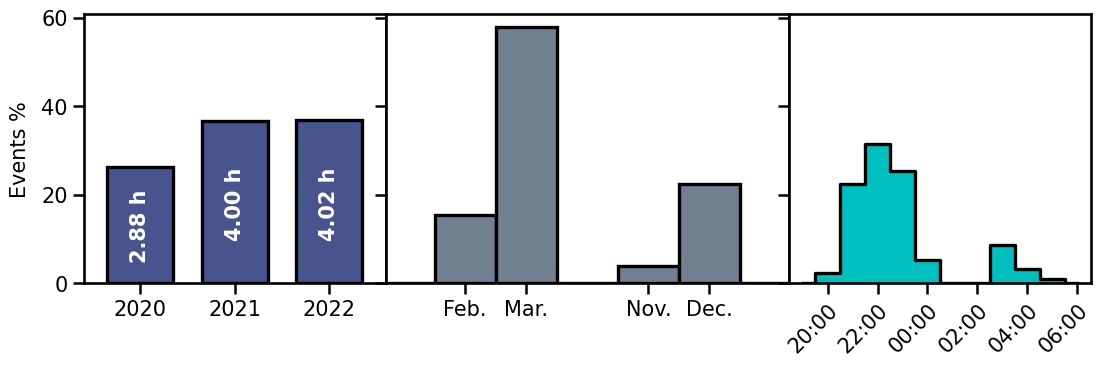

In [5]:
c1 = '#47548D'
c2 = 'slategray'
c3 = 'c'

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(13, 3.5), gridspec_kw={'width_ratios': [1.5, 2, 1.5]}, sharey=True)

lendata = len(dfT1['year'].to_numpy())
bins = np.linspace(2019.5, 2022.5, 4)
hist, _ = np.histogram(dfT1['year'].to_numpy(), bins=bins)
bins_c  = (bins[:-1] + bins[1:]) / 2
ax1.bar(bins_c, hist/lendata*100, width=.7, color=c1, edgecolor='k', linewidth=2.4)

ax1.text(2020, 13, f'{(obs_time*hist/lendata)[0]:.2f} h', **kw_txt, rotation=90, color='w', weight='bold')
ax1.text(2021, 18, f'{(obs_time*hist/lendata)[1]:.2f} h', **kw_txt, rotation=90, color='w', weight='bold')
ax1.text(2022, 18, f'{(obs_time*hist/lendata)[2]:.2f} h', **kw_txt, rotation=90, color='w', weight='bold')

bins = np.linspace(0.5, 12.5, 13)
hist, _ = np.histogram(dfT1['month'].to_numpy(), bins=bins)

histmod = np.array([0, hist[1], hist[2], 0, hist[10], hist[11], 0])
binmod  = [0, 1, 2, 3, 4, 5, 6]

ax2.bar(binmod, histmod/lendata*100, width=1, color=c2, edgecolor='k', linewidth=2.4)


bins = np.linspace(-0.5, 23.5, 25)
hist, _ = np.histogram(dfT1['hour'].to_numpy(), bins=bins)
bins_c  = (bins[:-1] + bins[1:]) / 2

histmod = np.array(list(hist)[19:] + list(hist)[:7])
binmod  = list(bins_c)[19:] + list(24 + (bins_c))[:7]

ax3.fill_between(binmod, histmod/lendata*100, 0, step='mid', color=c3)
ax3.plot(binmod, histmod/lendata*100, ds='steps-mid', color='k', linewidth=2.4)


ax2.set_xticks([1, 2, 4, 5])
month_lab = ['Feb.', 'Mar.', 'Nov.', 'Dec.']
ax2.set_xticklabels(month_lab, rotation=0, ha='center')

ax3.set_xticks([20.0, 22.0, 24.0, 26.0, 28.0, 30.0])
ax3.set_xticklabels(['20:00', '22:00', '00:00', '02:00', '04:00', '06:00'], rotation=45, ha='right', rotation_mode='anchor')

ax1.set_xlim(2019.4, 2022.6)
ax2.set_xlim(-0.3, 6.3)

ax1.set_ylabel('Events %', labelpad=8)

plt.subplots_adjust(wspace=0., hspace=0)


plt.savefig(f'{pltpath}dataset-dates-ditribution.pdf', bbox_inches='tight', dpi=dpi)
plt.show()

## Pointing directions

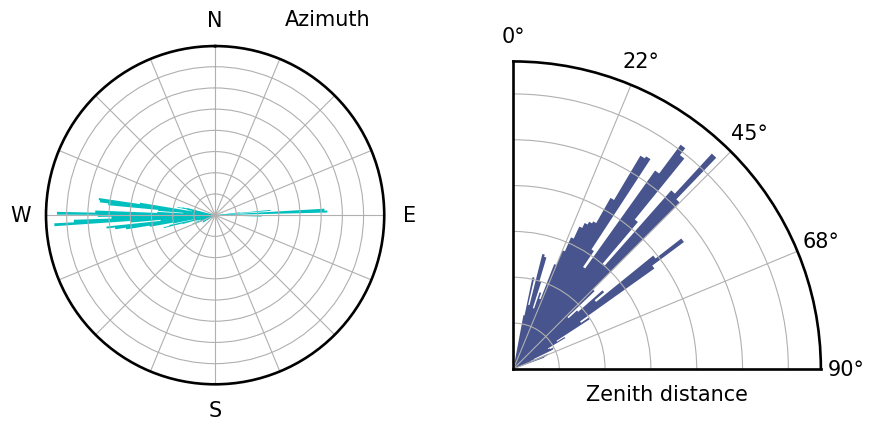

In [6]:
c2 = '#47548D'
c1 = 'c'

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(9, 5), gridspec_kw={'width_ratios': [1.1, 1]}, 
                              subplot_kw=dict(projection="polar"))

# ax1.set_title(f'azimuth pointing')
# ax2.set_title(f'zenith distance pointing')

#####################
# --- histogram --- #
#####################
ax1.hist(np.deg2rad(df['pointing_az'].to_numpy()), bins=200, histtype='stepfilled', color=c1)
ax2.hist(np.deg2rad(df['pointing_zd'].to_numpy()), bins=50, histtype='stepfilled', color=c2)
#####################

#########################
# --- setting ticks --- #
#########################
ticks = [i*np.pi/8 for i in range(16)]
ax1.set_xticks(ticks)
tick_lab = []
for t in ticks:
    if t == 0:
        tick_lab.append('N')
    elif t == np.pi/2:
        tick_lab.append('E')
    elif t == np.pi:
        tick_lab.append('S')
    elif t == 3*np.pi/2:
        tick_lab.append('W')
    else:
        tick_lab.append('')
        
ax1.set_xticklabels(tick_lab)
ax1.set_yticklabels([])
ax2.set_xticks([i*np.pi/8 for i in range(5)])
ax2.set_yticklabels([])
#########################

ax1.set_thetamin(0)
ax1.set_thetamax(360)
ax2.set_thetamin(0)
ax2.set_thetamax(90)
ax1.set_theta_zero_location('N')
ax2.set_theta_zero_location('N')
ax1.set_theta_direction(-1)
ax2.set_theta_direction(-1)
fig.tight_layout()

ax2.set_xlabel('Zenith distance')

ax1.text(0.33, 0.88, 'Azimuth', rotation=0,  transform=plt.gcf().transFigure)

plt.subplots_adjust(wspace=0.4, hspace=0)

plt.savefig(f'{pltpath}angular-distributions-dataset.pdf', bbox_inches='tight', dpi=dpi)
plt.show()

In [7]:
np.mean(df['pointing_az'].to_numpy()), np.median(df['pointing_az'].to_numpy())

(241.5252945018644, 266.457770234407)

In [8]:
np.mean(df['pointing_zd'].to_numpy()), np.median(df['pointing_zd'].to_numpy())

(37.416901630742615, 37.35343356722972)

In [9]:
dfT1_c3 = dfT1.query('combo_type == 3')
dfT2_c3 = dfT2.query('combo_type == 3')
dfT3_c3 = dfT3.query('combo_type == 3')

dfT1_c3['angular_M1_M2'] = geom.angular_distance(dfT2_c3['pointing_zd'].to_numpy(),
                                       dfT2_c3['pointing_az'].to_numpy(),
                                       dfT3_c3['pointing_zd'].to_numpy(),
                                       dfT3_c3['pointing_az'].to_numpy())
dfT1_c3['angular_LST_M1'] = geom.angular_distance(dfT1_c3['pointing_zd'].to_numpy(),
                                        dfT1_c3['pointing_az'].to_numpy(),
                                        dfT2_c3['pointing_zd'].to_numpy(),
                                        dfT2_c3['pointing_az'].to_numpy())

dfT2_c3['angular_LST_M1'] = dfT1_c3['angular_M1_M2']
dfT2_c3['angular_M1_M2']  = dfT1_c3['angular_LST_M1']
dfT3_c3['angular_LST_M1'] = dfT1_c3['angular_M1_M2']
dfT3_c3['angular_M1_M2']  = dfT1_c3['angular_LST_M1']

/tmp/ipykernel_846/4163864077.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfT1_c3['angular_M1_M2'] = geom.angular_distance(dfT2_c3['pointing_zd'].to_numpy(),
/tmp/ipykernel_846/4163864077.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfT1_c3['angular_LST_M1'] = geom.angular_distance(dfT1_c3['pointing_zd'].to_numpy(),
/tmp/ipykernel_846/4163864077.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

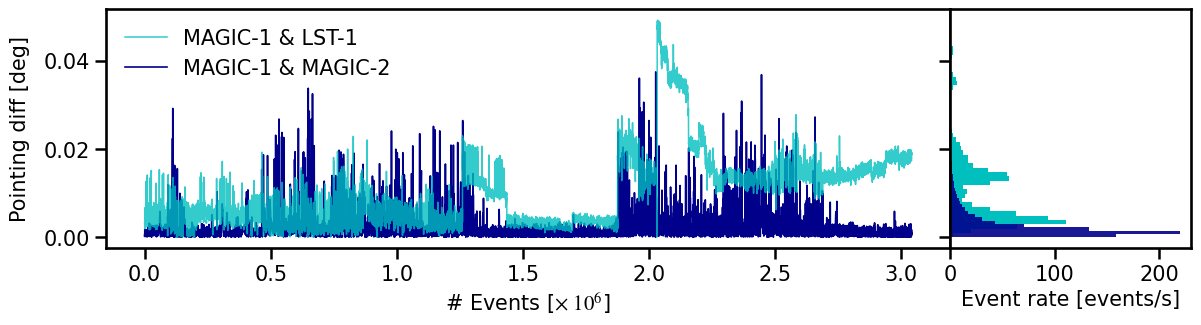

In [10]:
c = ['c', 'darkblue']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3.1), gridspec_kw={'width_ratios': [3.5, 1]}, sharey=True)

n_events = np.arange(len(dfT1_c3['angular_LST_M1'].to_numpy()))*1e-6
ax1.plot(n_events, dfT1_c3['angular_LST_M1'].to_numpy(), lw=1.1, color=c[0], label='MAGIC-1 & LST-1', zorder=1, alpha=0.8)
ax1.plot(n_events, dfT1_c3['angular_M1_M2'].to_numpy(),  lw=1.2, color=c[1], label='MAGIC-1 & MAGIC-2', zorder=0)


norm_factor = obs_time / len(dfT1_c3['angular_LST_M1'].to_numpy()) * 3600 / 50
weights     = np.full_like(dfT1_c3['angular_LST_M1'].to_numpy(), norm_factor)


ax2.hist(dfT1_c3['angular_LST_M1'].to_numpy(), bins=50, orientation='horizontal', histtype='stepfilled', color=c[0], weights=weights)
ax2.hist(dfT1_c3['angular_M1_M2'].to_numpy(),  bins=50, orientation='horizontal', histtype='stepfilled', color=c[1], alpha=0.9, weights=weights)

ax1.legend(frameon=False)
ax1.set_xlabel('# Events [$\\times \ 10^{6}$]')
ax2.set_xlabel('Event rate [events/s]')
ax1.set_ylabel('Pointing diff [deg]', labelpad=10)
plt.subplots_adjust(wspace=0., hspace=0)


plt.savefig(f'{pltpath}pointing-diff.pdf', bbox_inches='tight', dpi=dpi)
plt.show()

In [11]:
np.mean(dfT1_c3['angular_LST_M1'].to_numpy()), np.mean(dfT1_c3['angular_M1_M2'].to_numpy())

(0.01006018374182268, 0.002698876305816555)

/home/juan.jimenez/.conda/envs/magic-lst1/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


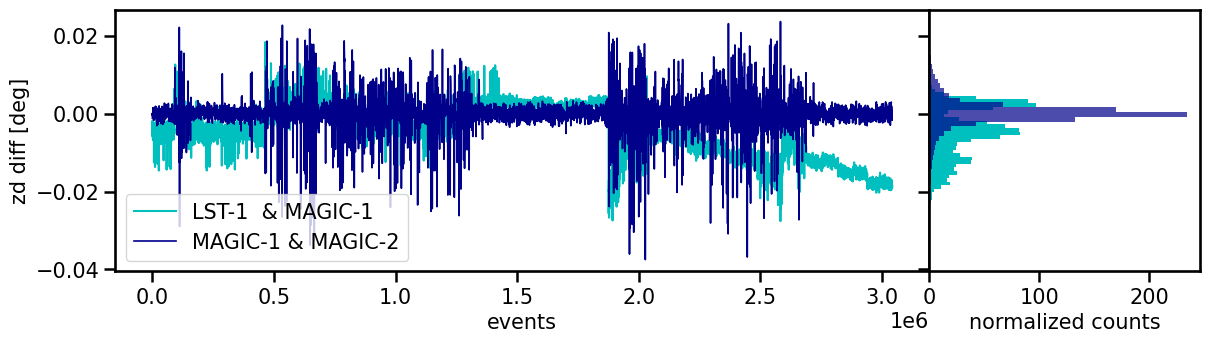

In [12]:
c = ['c', 'darkblue']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3.4), gridspec_kw={'width_ratios': [3, 1]}, sharey=True)

ax1.plot(dfT1_c3['pointing_zd'].to_numpy() - dfT2_c3['pointing_zd'].to_numpy(), lw=1.5, color=c[0], label='LST-1  & MAGIC-1')
ax1.plot(dfT2_c3['pointing_zd'].to_numpy() - dfT3_c3['pointing_zd'].to_numpy(),  lw=1.2, color=c[1], label='MAGIC-1 & MAGIC-2')

ax2.hist(dfT1_c3['pointing_zd'].to_numpy() - dfT2_c3['pointing_zd'].to_numpy(), bins=50, orientation='horizontal', histtype='stepfilled', color=c[0], density=True)
ax2.hist(dfT2_c3['pointing_zd'].to_numpy() - dfT3_c3['pointing_zd'].to_numpy(),  bins=50, orientation='horizontal', histtype='stepfilled', color=c[1], alpha=0.7, density=True)

ax1.legend()
ax1.set_xlabel('events')
ax2.set_xlabel('normalized counts')
ax1.set_ylabel('zd diff [deg]')
plt.subplots_adjust(wspace=0., hspace=0)
plt.show()

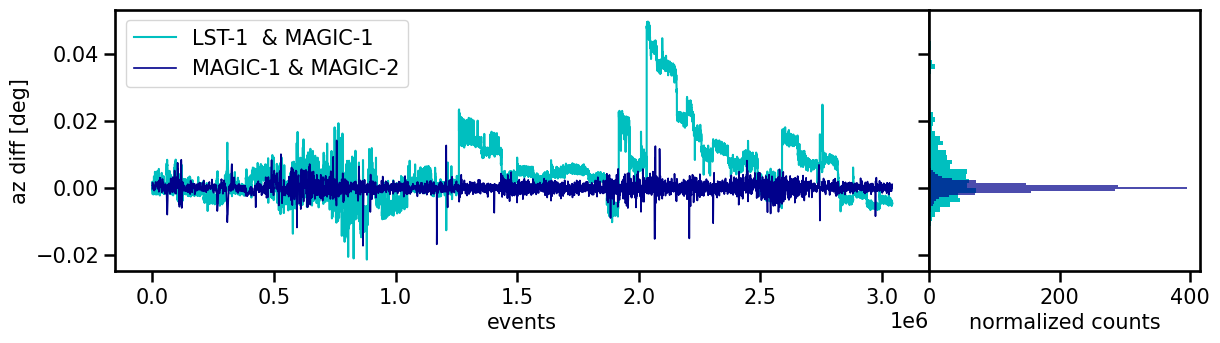

In [13]:
c = ['c', 'darkblue']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3.4), gridspec_kw={'width_ratios': [3, 1]}, sharey=True)

ax1.plot(dfT1_c3['pointing_az'].to_numpy() - dfT2_c3['pointing_az'].to_numpy(), lw=1.5, color=c[0], label='LST-1  & MAGIC-1')
ax1.plot(dfT2_c3['pointing_az'].to_numpy() - dfT3_c3['pointing_az'].to_numpy(),  lw=1.2, color=c[1], label='MAGIC-1 & MAGIC-2')

ax2.hist(dfT1_c3['pointing_az'].to_numpy() - dfT2_c3['pointing_az'].to_numpy(), bins=50, orientation='horizontal', histtype='stepfilled', color=c[0], density=True)
ax2.hist(dfT2_c3['pointing_az'].to_numpy() - dfT3_c3['pointing_az'].to_numpy(),  bins=50, orientation='horizontal', histtype='stepfilled', color=c[1], alpha=0.7, density=True)

ax1.legend()
ax1.set_xlabel('events')
ax2.set_xlabel('normalized counts')
ax1.set_ylabel('az diff [deg]')
plt.subplots_adjust(wspace=0., hspace=0)
plt.show()

In [14]:
path = '/fefs/aswg/workspace/juan.jimenez/data/dl1/other_data/'
df_feature  = pd.read_csv(os.path.join(path,f'feature_data_{source_name}.total.csv'))
df_feature1 = pd.read_csv(os.path.join(path,f'feature_data_{source_name}.first_epoch.csv'))
df_feature2 = pd.read_csv(os.path.join(path,f'feature_data_{source_name}.second_epoch.csv'))
df_profile  = pd.read_csv(os.path.join(path,f'profile_data_{source_name}.total.csv'))
df_profile1 = pd.read_csv(os.path.join(path,f'profile_data_{source_name}.first_epoch.csv'))
df_profile2 = pd.read_csv(os.path.join(path,f'profile_data_{source_name}.second_epoch.csv'))

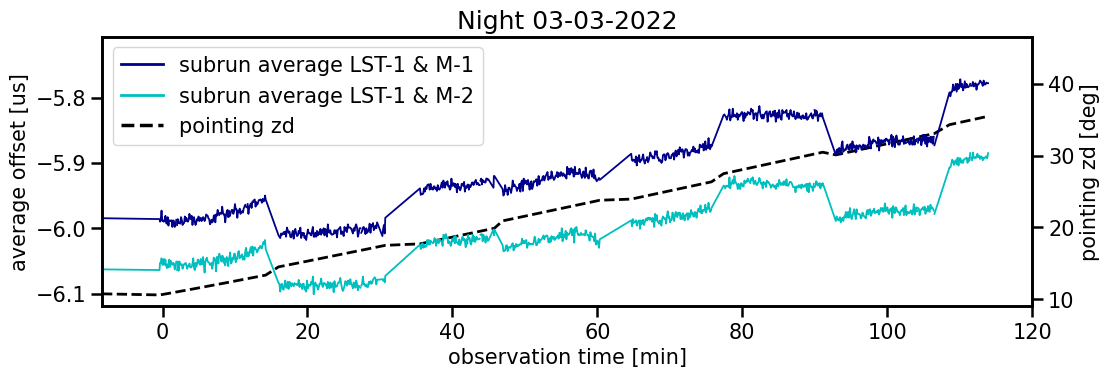

In [15]:
fig, ax = plt.subplots(figsize=(12, 3.5))

ax2 = ax.twinx()
ax2.set_zorder(-10)
ax.patch.set_visible(False)

time = (df_feature2.query(f'coincidence_id == {12}')['unix_time'].to_numpy() - 1.6463e9 -40000)/60
# time = (df_feature2.query(f'coincidence_id == {12}')['unix_time'].to_numpy() - 1.6463e9 -40000)/60

offset1 = df_feature2.query(f'coincidence_id == {12}')['average_offset'].to_numpy()
offset2 = df_feature2.query(f'coincidence_id == {13}')['average_offset'].to_numpy()

pointalt1 = 90 - np.rad2deg(df_feature2.query(f'coincidence_id == {12}')['pointing_alt_lst'].to_numpy())
pointalt2 = 90 - np.rad2deg(df_feature2.query(f'coincidence_id == {12}')['pointing_alt_magic'].to_numpy())
pointaz1 = df_feature2.query(f'coincidence_id == {12}')['pointing_az_lst'].to_numpy()
pointaz2 = df_feature2.query(f'coincidence_id == {12}')['pointing_az_magic'].to_numpy()


minss = [233, 372, 496, 588, 711, 813, 934,  1054, 1163, 1273, 1293, 1318]
maxss = [372, 496, 588, 711, 813, 934, 1054, 1163, 1273, 1293, 1318, 1338]
color_arr = [aux.color_cr((i+1)/len(minss)) for i in range(len(minss))]

for mins, maxs, color in zip(minss, maxss, color_arr):
    ax.plot(time[mins:maxs], offset1[mins:maxs], '-', ms=2, lw=1.3, color='darkblue')
    ax.plot(time[mins:maxs], offset2[mins:maxs], '-', ms=2, lw=1.3, color='c')
ax2.plot(time[minss[0]:maxss[-1]], pointalt1[minss[0]:maxss[-1]], '--', lw=2, color='k')
    


ax.plot([], [], '-', color='darkblue', ms=2, lw=2, label='subrun average LST-1 & M-1')
ax.plot([], [], '-', color='c', ms=2, lw=2, label='subrun average LST-1 & M-2')
ax.plot([], [], '--', lw=2.5, color='k', label='pointing zd')

ax.set_xlim(-500/60, 120)
ax2.set_ylim(9, 46.5)

ax.legend(loc=2)
ax.set_ylabel('average offset [us]')
ax2.set_ylabel('pointing zd [deg]')
ax.set_xlabel('observation time [min]')
ax.set_title('Night 03-03-2022')
plt.show()

In [16]:
c12 = np.sum(df_feature.query(f'coincidence_id == {12}')['n_coincidence'].to_numpy())
c13 = np.sum(df_feature.query(f'coincidence_id == {13}')['n_coincidence'].to_numpy())

m12 = np.sum(df_feature.query(f'coincidence_id == {12}')['n_events_magic'].to_numpy())
m13 = np.sum(df_feature.query(f'coincidence_id == {13}')['n_events_magic'].to_numpy())

## Coincidence profile

In [17]:
# calculating means
mean1 = np.mean(df_feature1.query(f'coincidence_id == {12}')['average_offset'].to_numpy())
mean2 = np.mean(df_feature2.query(f'coincidence_id == {12}')['average_offset'].to_numpy())

The mean of the offsets:
For 2020 & 2021 data --> -2.960 [us]
For 2022        data --> -5.926 [us]


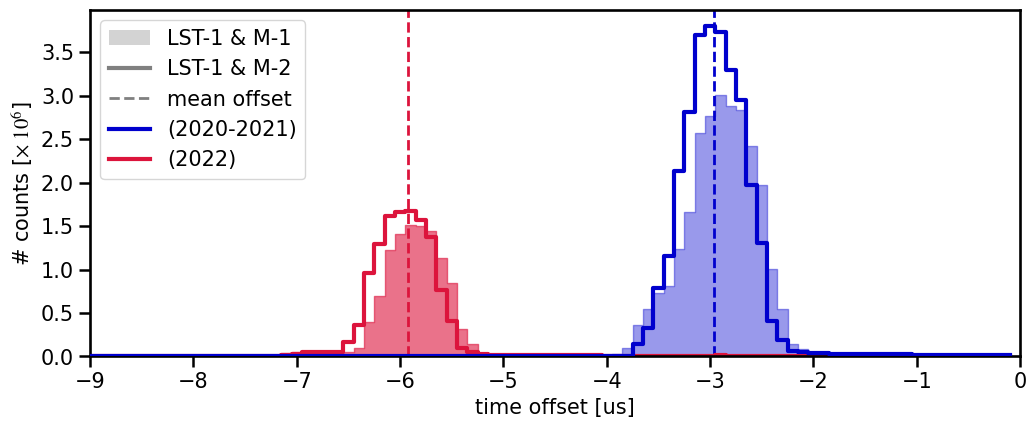

In [18]:
print(f'The mean of the offsets:')
print(f'For 2020 & 2021 data --> {mean1:.3f} [us]')
print(f'For 2022        data --> {mean2:.3f} [us]')

fig, ax = plt.subplots(figsize=(12, 4.5))

ax.hist([], color='lightgray', label='LST-1 & M-1')
ax.plot([], [], '-', color='gray', lw=3, label='LST-1 & M-2')
ax.plot([], [], '--', c='gray', lw=2, label='mean offset')

# ax.plot(df_profile1['time_offset'], df_profile1['n_coincidence_tel12'], lw=1, ds='steps-mid', color='royalblue', label='LST-1 & M-1 (2020-2021)')
ax.fill_between(df_profile1['time_offset'], df_profile1['n_coincidence_tel12']*1e-6, step='mid', color='mediumblue', alpha=0.4)
ax.plot(df_profile1['time_offset'], df_profile1['n_coincidence_tel13']*1e-6, lw=3, ds='steps-mid', color='mediumblue', label='(2020-2021)', zorder=10)
ax.axvline(mean1, ls='--', lw=2, color='mediumblue')

# ax.plot(df_profile2['time_offset'], df_profile2['n_coincidence_tel12'], lw=3, ds='steps-mid', color='lightcoral', label='LST-1 & M-1 (2022)')
ax.fill_between(df_profile2['time_offset'], df_profile2['n_coincidence_tel12']*1e-6, step='mid', color='crimson', alpha=0.6)
ax.plot(df_profile2['time_offset'], df_profile2['n_coincidence_tel13']*1e-6, lw=3, ds='steps-mid', color='crimson', label='(2022)')
ax.axvline(mean2, ls='--', lw=2, color='crimson')


# ax.axvspan(mean1 + 0.6, mean1 - 0.6, zorder=-10, color='mediumblue', alpha=0.1)
# ax.axvspan(mean2 + 0.6, mean2 - 0.6, zorder=-10, color='crimson', alpha=0.1)

ax.set_xlim(-9, 0)
ax.ticklabel_format(style='plain')
ax.legend(loc=2)
ax.set_ylabel('# counts [$\\times \ 10^{6}$]')
ax.set_xlabel('time offset [us]')
# ax.grid()
plt.show()

In [19]:
lendata = len(dfT1['year'].to_numpy())
bins = np.linspace(2019.5, 2022.5, 4)
hist, _ = np.histogram(dfT1['year'].to_numpy(), bins=bins)
year_obs_time = obs_time*hist/lendata*3600

obs_1 = year_obs_time[0] + year_obs_time[1]
obs_2 = year_obs_time[2]

The mean of the offsets:
For 2020 & 2021 data --> -2.960 [us]
For 2022        data --> -5.926 [us]


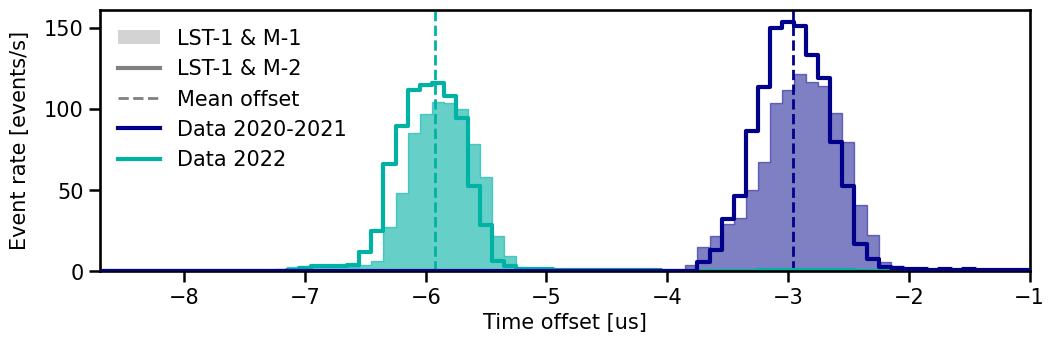

In [23]:
c1 = 'darkblue'
c2 = '#00B2A4'


print(f'The mean of the offsets:')
print(f'For 2020 & 2021 data --> {mean1:.3f} [us]')
print(f'For 2022        data --> {mean2:.3f} [us]')

fig, ax = plt.subplots(figsize=(12, 3.4))

ax.hist([], color='lightgray', label='LST-1 & M-1')
ax.plot([], [], '-', color='gray', lw=3, label='LST-1 & M-2')
ax.plot([], [], '--', c='gray', lw=2, label='Mean offset')

# ax.plot(df_profile1['time_offset'], df_profile1['n_coincidence_tel12'], lw=1, ds='steps-mid', color='royalblue', label='LST-1 & M-1 (2020-2021)')
ax.fill_between(df_profile1['time_offset'], df_profile1['n_coincidence_tel12']/obs_1, step='mid', color=c1, alpha=0.5)
ax.plot(df_profile1['time_offset'], df_profile1['n_coincidence_tel13']/obs_1, lw=3, ds='steps-mid', color=c1, label='Data 2020-2021', zorder=10)
ax.axvline(mean1, ls='--', lw=2, color=c1)

# ax.plot(df_profile2['time_offset'], df_profile2['n_coincidence_tel12'], lw=3, ds='steps-mid', color='lightcoral', label='LST-1 & M-1 (2022)')
ax.fill_between(df_profile2['time_offset'], df_profile2['n_coincidence_tel12']/obs_2, step='mid', color=c2, alpha=0.6)
ax.plot(df_profile2['time_offset'], df_profile2['n_coincidence_tel13']/obs_2, lw=3, ds='steps-mid', color=c2, label='Data 2022')
ax.axvline(mean2, ls='--', lw=2, color=c2)


# ax.axvspan(mean1 + 0.6, mean1 - 0.6, zorder=-10, color='mediumblue', alpha=0.1)
# ax.axvspan(mean2 + 0.6, mean2 - 0.6, zorder=-10, color='crimson', alpha=0.1)

ax.set_xlim(-8.7, -1)
ax.ticklabel_format(style='plain')
ax.legend(loc=2, frameon=False)
ax.set_ylabel('Event rate [events/s]', labelpad=10)
ax.set_xlabel('Time offset [us]')
# ax.grid()

plt.savefig(f'{pltpath}time-offsets.pdf', bbox_inches='tight', dpi=dpi)
plt.show()